 <h1><center>Ad Click Prediction</center></h1>
 
 # Data Science Project - [Kaggle](https://www.kaggle.com/fayomi/advertising)
 
 ### AUTHOR - Santosh Konchada
 
 ###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Introduction

The goal of the project is to __Predict who is likely going to click on the Ad__ on a website based on the features of a user. Following are the features involved in this dataset which is obtained from Kaggle.

|           Feature               |                  Description                           |
|---------------------------------|--------------------------------------------------------|
|1. __Daily Time Spent on a Site__   | Time spent by the user on a site in minutes.        |
|2. __Age__                          | Customer's age in terms of years.                   |
|3. __Area Income__                  | Average income of geographical area of consumer.    |
|4. __Daily Internet Usage__         | Avgerage minutes in a day consumer is on the internet.|
|5. __Ad Topic Line__                | Headline of the advertisement.                      | 
|6. __City__                         | City of the consumer.                               |
|7. __Male__                         | Whether or not a consumer was male.                 |
|8. __Country__                      | Country of the consumer.                            |
|9. __Timestamp__                    | Time at which user clicked on an Ad or the closed window.|
|10. __Clicked on Ad__               | 0 or 1 is indicated clicking on an Ad.              |




Let's consider that we are working for a marketing company. Firstly, we have to understand what constitutes a profit and a loss.


__This notebook will contain Machine learning models part related to this project__. 


Steps involved in this Notebook

- [Building a basic model](#Basic-model-building-based-on-the-actual-data)
- [feature engineering](#Feature-Engineering)
- [Building Logistic Regression Model](#Building-Logistic-Regression-Model )
- [Random Forest Model](#Random-Forest-Model)
- [Models Performances on Test Data](#Test-Models-Performance)
- [Feature Importances](#Random Forest Feature Importances)


__Note:__ The Data obtained is cleaned.

# Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Data

In [2]:
# Read the files
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Basic model building based on the actual data

In [3]:
# Importing train_test_split from sklearn.model_selection family
from sklearn.model_selection import train_test_split

In [4]:
# Assigning Numerical columns to X & y only as model can only take numbers
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [5]:
# Splitting the data into train & test sets 
# test_size is % of data that we want to allocate & random_state ensures a specific set of random splits on our data because 
#this train test split is going to occur randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
# We dont have to use stratify method in train_tst_split to handle class distribution as its not imbalanced and does contain equal number of classes i.e 1's and 0's
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 5) (670,)
(330, 5) (330,)


# Building a Basic Model

In [6]:
# Import LogisticRegression from sklearn.linear_model family
from sklearn.linear_model import LogisticRegression

In [7]:
# Instantiate an instance of the linear regression model (Creating a linear regression object)
logreg = LogisticRegression()
# Fit the model on training data using a fit method
model = logreg.fit(X_train,y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions

In [8]:
# The predict method just takes X_test as a parameter, which means it just takes the features to draw predictions
predictions = logreg.predict(X_test)
# Below are the results of predicted click on Ads
predictions[0:20]

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

## Performance Metrics

Now we need to see how far our predictions met the actual test data (y_test) by performing evaluations using classification report & confusion matrix on the target variable and the predictions.

**confusion matrix** is used to evaluate the model behavior from a matrix. Below is how a confusion matrix looks like:

                    Predicted No   Predicted Yes
    Actual No          TN                 FP 

    Actual Yes         FN                 TP   

TP- True Positive 	TN- True Negative 
FP- False Positive 	FN- False Negative 

True Positive is the proportion of positives that are correctly identified. Similarly, True Negative is the proportion of negatives that are correctly identified. False Positive is the condition where we predict a result that is actually doesn't fulfill. Similarly, False Negative is the condition where the prediction failed, when it was actually successful.

If we want to calculate any specific value, we can do it from confusion matrix directly.

**classification_report** will basically tell us the precision, recall value's accuracy, f1 score & support. This way we don't have to read it ourself from a confusion matrix.

**precision** is the fraction of retrieved values that are relevant to the data. The precision is the ratio of tp / (tp + fp).

**recall** is the fraction of successfully retrieved values that are relevant to the data. The recall is the ratio of          tp / (tp + fn). 

**f1-score** is the harmonic mean of precision and recall. Where an fscore reaches its best value at 1 and worst score at 0.

**support** is the number of occurrences of each class in y_test.

In [9]:
# Importing classification_report from sklearn.metrics family
from sklearn.metrics import classification_report

# Printing classification_report to see the results
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



In [10]:
# Importing a pure confusion matrix from sklearn.metrics family
from sklearn.metrics import confusion_matrix

# Printing the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[156   6]
 [ 24 144]]


## Results for Basic Model

The results from evaluation are as follows:

**Confusion Matrix:** 

The users that are predicted to click on commercials and the actually clicked users were 144, the people who were predicted not to click on the commercials and actually did not click on them were 156.

The people who were predicted to click on commercial and actually did not click on them are 6, and the users who were not predicted to click on the commercials and actually clicked on them are 24.

We have only a few mislabelled points which is not bad from the given size of the dataset.

**Classification Report:**

From the report obtained, the precision & recall are 0.91 which depicts the predicted values are 91% accurate. Hence the probability that the user can click on the commercial is 0.91 which is a good precision value to get a good model.  

# Feature Engineering

In [11]:
new_df = df.copy() # just to keep the original dataframe unchanged

In [12]:
# Feature engineering on time variable
new_df['Timestamp'] = pd.to_datetime(new_df['Timestamp'])
new_df['Month'] = new_df['Timestamp'].dt.month
new_df['Day'] = new_df['Timestamp'].dt.day
new_df['Hour'] = new_df['Timestamp'].dt.hour
new_df["Weekday"] = new_df['Timestamp'].dt.dayofweek
new_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6,3,3,4


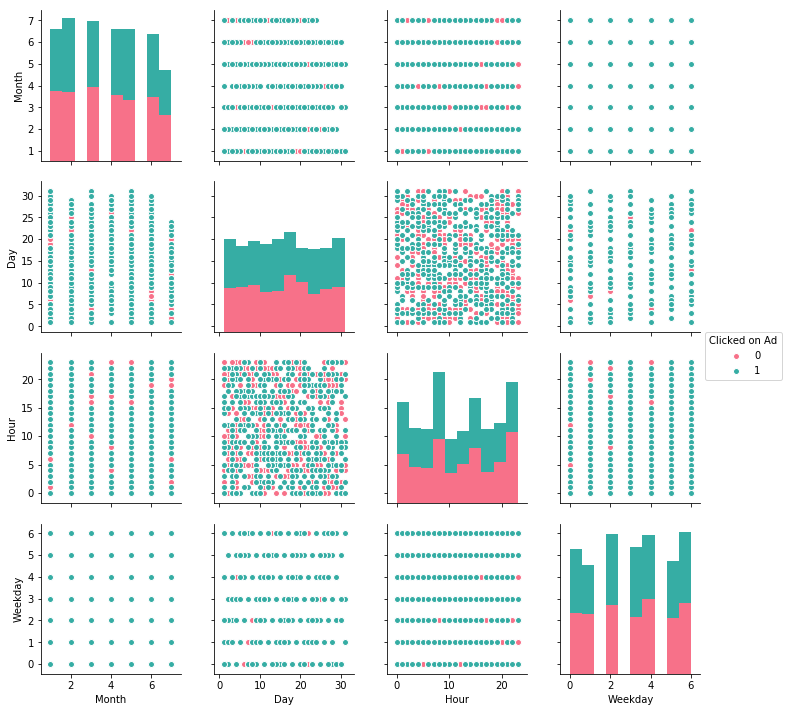

In [13]:
# Creating pairplot to check effect of datetime variables on target variable
pp = sns.pairplot(new_df, hue= 'Clicked on Ad', vars = ['Month', 'Day', 'Hour', 'Weekday'], palette= 'husl')

There dont seems to be any effect of month, day, weekday and hour on the target variable. 

In [14]:
# Dummy encoding on Month column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Month'], prefix='Month')], axis=1) 
# Dummy encoding on weekday column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Weekday'], prefix='Weekday')], axis=1)

In [15]:
# Creating buckets for hour columns based on EDA part
new_df['Hour_bins'] = pd.cut(new_df['Hour'], bins = [0, 5, 11, 17, 23], 
                        labels = ['Hour_0-5', 'Hour_6-11', 'Hour_12-17', 'Hour_18-23'], include_lowest= True)

In [16]:
# Dummy encoding on Hour_bins column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Hour_bins'], prefix='Hour')], axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

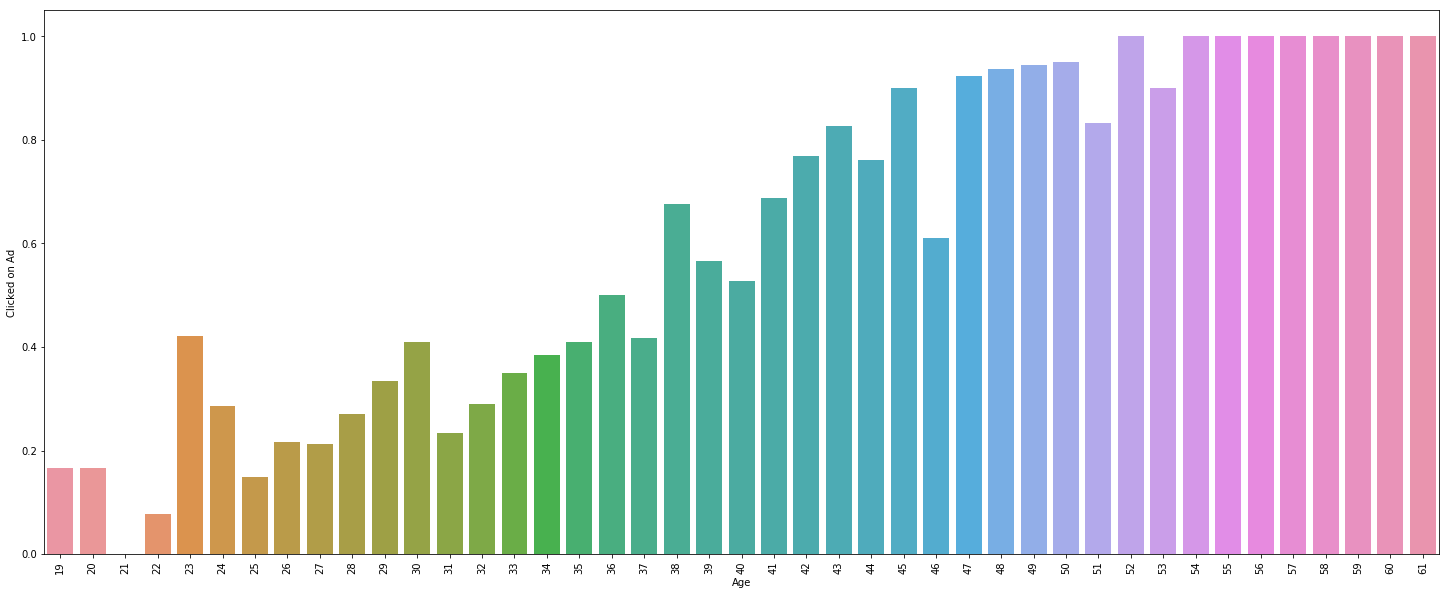

In [17]:
# Feature engineering on Age column
plt.figure(figsize=(25,10))
sns.barplot(new_df['Age'],df['Clicked on Ad'], ci=None)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

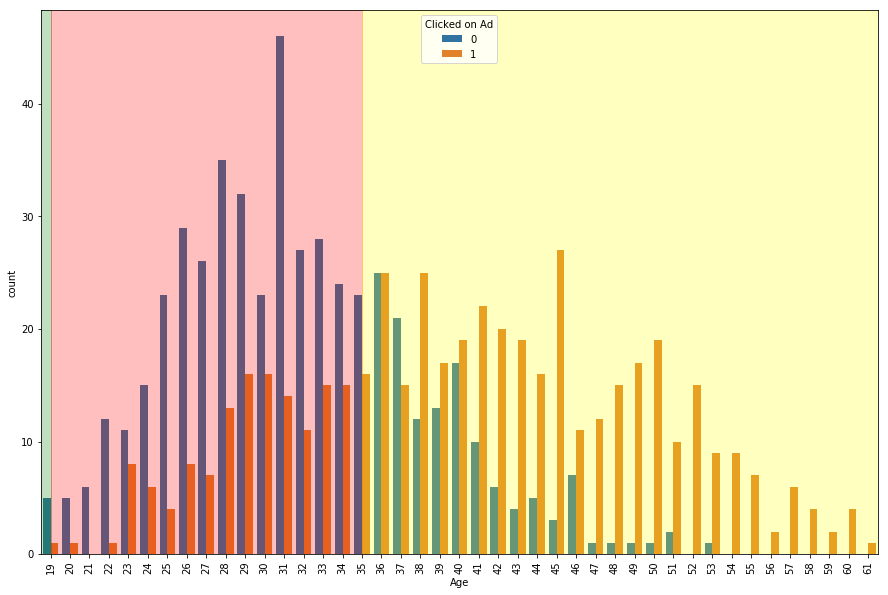

In [18]:
# checking bins
limit_1 = 18
limit_2 = 35

x_limit_1 = np.size(df[df['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(df[df['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(15,10))
#sns.barplot(df['age'],df['survival_7_years'], ci=None)
sns.countplot('Age',hue='Clicked on Ad',data=df)
plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 50, alpha=0.25, color='yellow')

plt.xticks(rotation=90)

In [19]:
# Creating Bins on Age column based on above plots
new_df['Age_bins'] = pd.cut(new_df['Age'], bins=[0, 18, 30, 45, 70], labels=['Young','Adult','Mid', 'Elder'])

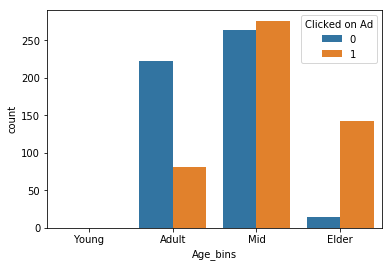

In [20]:
sns.countplot('Age_bins',hue='Clicked on Ad',data= new_df) # Verifying the bins by checking the count

In [21]:
# Dummy encoding on Age column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Age_bins'], prefix='Age')], axis=1) 

In [22]:
# Dummy encoding on Column column based on EDA
new_df = pd.concat([new_df, pd.get_dummies(new_df['Country'], prefix='Country')], axis=1)

In [23]:
# Remove redundant and no predictive power features
new_df.drop(['Country', 'Ad Topic Line', 'City', 'Timestamp', 'Day', 'Month', 'Weekday', 
             'Hour', 'Hour_bins', 'Age', 'Age_bins'], axis = 1, inplace = True)
new_df.head() # Checking the final dataframe

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month_1,Month_2,Month_3,Month_4,Month_5,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,61833.90,256.09,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,68441.85,193.77,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,59785.94,236.50,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,54806.18,245.89,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,73889.99,225.58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building Logistic Regression Model

In [24]:
X = new_df.drop(['Clicked on Ad'],1)
y = new_df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
# Standarizing the features
from  sklearn.preprocessing  import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 263) (800,)
(200, 263) (200,)


In [26]:
import  statsmodels.api  as sm
from scipy import stats

X2   = sm.add_constant(X_train_std)
est  = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Clicked on Ad   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     17.75
Date:                Sun, 05 Aug 2018   Prob (F-statistic):          8.68e-164
Time:                        17:49:14   Log-Likelihood:                 314.62
No. Observations:                 800   AIC:                            -115.2
Df Residuals:                     543   BIC:                             1089.
Df Model:                         256                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4863      0.007     69.390      0.0

We can see that the feature __Male(Gender)__ does not contribute to the model (i.e., see x4) so we can actually remove that variable from our model.

In [39]:
X = new_df.drop(['Clicked on Ad', 'Male'],1) 
y = new_df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [40]:
X2   = sm.add_constant(X_train_std)
est  = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Clicked on Ad   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     17.75
Date:                Sun, 05 Aug 2018   Prob (F-statistic):          8.68e-164
Time:                        17:49:52   Log-Likelihood:                 314.62
No. Observations:                 800   AIC:                            -115.2
Df Residuals:                     543   BIC:                             1089.
Df Model:                         256                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4863      0.007     69.390      0.0

After removing __male__ feature we can observe that __Adjusted R-squared has not changed__ from the previous model. Therefore we can conclude that gender was not contributing to our model and the main contributing features would be:

- Daily Time Spent on site
- Daily Internet Usage
- Age
- Country
- Area income

In [28]:
# Applying logistic regression model to training data
lr = LogisticRegression(penalty="l2", C= 0.1, random_state=42)
lr.fit(X_train_std, y_train)
# Predict using model
lr_training_pred = lr.predict(X_train_std)
lr_training_prediction = accuracy_score(y_train, lr_training_pred)

print( "Accuracy of Logistic regression training set:",   round(lr_training_prediction,3))

Accuracy of Logistic regression training set: 0.992


In [29]:
#Creating K fold Cross-validation 
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lr, # model
                         X_train_std, # Feature matrix
                         y_train, # Target vector
                         cv=kf, # Cross-validation technique
                         scoring="accuracy", # Loss function
                         n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

10 fold CV accuracy: 0.954 +/- 0.021


The cross validated score for Logistic Regression Classifier is: 95.38


Text(0.5,1.05,'Confusion_matrix')

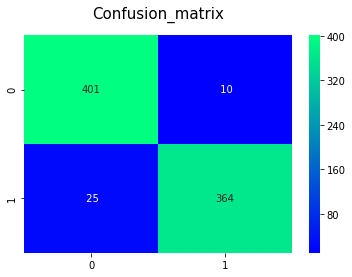

In [30]:
from sklearn.model_selection import cross_val_predict
print('The cross validated score for Logistic Regression Classifier is:',round(scores.mean()*100,2))
y_pred = cross_val_predict(lr,X_train_std,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="winter")
plt.title('Confusion_matrix', y=1.05, size=15)

# Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', n_estimators=400,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=42,n_jobs=-1)
rf.fit(X_train_std,y_train)
# Predict using model
rf_training_pred = rf.predict(X_train_std)
rf_training_prediction = accuracy_score(y_train, rf_training_pred)

print("Accuracy of Random Forest training set:",   round(rf_training_prediction,3))

Accuracy of Random Forest training set: 0.994


In [32]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, # model
                         X_train_std, # Feature matrix
                         y_train, # Target vector
                         cv=kf, # Cross-validation technique
                         scoring="accuracy", # Loss function
                         n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

10 fold CV accuracy: 0.966 +/- 0.013


The cross validated score for Random Forest Classifier is: 96.62


Text(0.5,1.05,'Confusion_matrix')

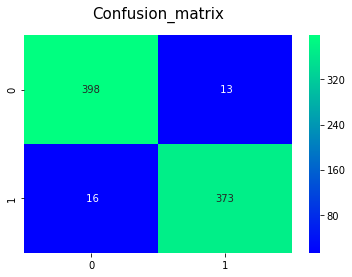

In [33]:
from sklearn.model_selection import cross_val_predict
print('The cross validated score for Random Forest Classifier is:',round(scores.mean()*100,2))
y_pred = cross_val_predict(rf,X_train_std,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="winter")
plt.title('Confusion_matrix', y=1.05, size=15)

# Test Models Performance

In [34]:
print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test_std))

print ("Logistic Regression AUC = %2.2f" % lr_auc)
print(classification_report(y_test, lr.predict(X_test_std)))

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test_std))

print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test_std)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.91
             precision    recall  f1-score   support

          0       0.84      0.97      0.90        89
          1       0.97      0.86      0.91       111

avg / total       0.91      0.91      0.91       200



 ---Random Forest Model---
Random Forest AUC = 0.94
             precision    recall  f1-score   support

          0       0.94      0.92      0.93        89
          1       0.94      0.95      0.95       111

avg / total       0.94      0.94      0.94       200



We can observe that random forest has higher accuracy compared to logistic regression model in both test and train data sets 

# ROC Graph

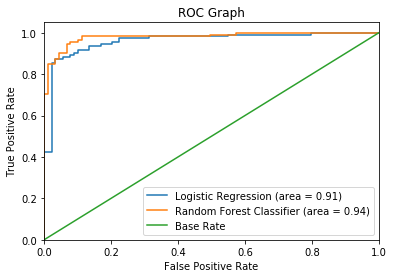

In [35]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test_std)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test_std)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)


# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Random Forest Feature Importances

In [36]:
columns = X.columns
train = pd.DataFrame(np.atleast_2d(X_train_std), columns=columns) # Converting numpy array list into dataframes

In [37]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances.head(10)

,index,importance
0,Daily Internet Usage,0.363155
1,Daily Time Spent on Site,0.283201
2,Area Income,0.113893
3,Age_Elder,0.039546
4,Age_Adult,0.028179
5,Age_Mid,0.008104
6,Country_Hungary,0.003655
7,Male,0.003080
8,Hour_Hour_6-11,0.003060
9,Country_Australia,0.002839


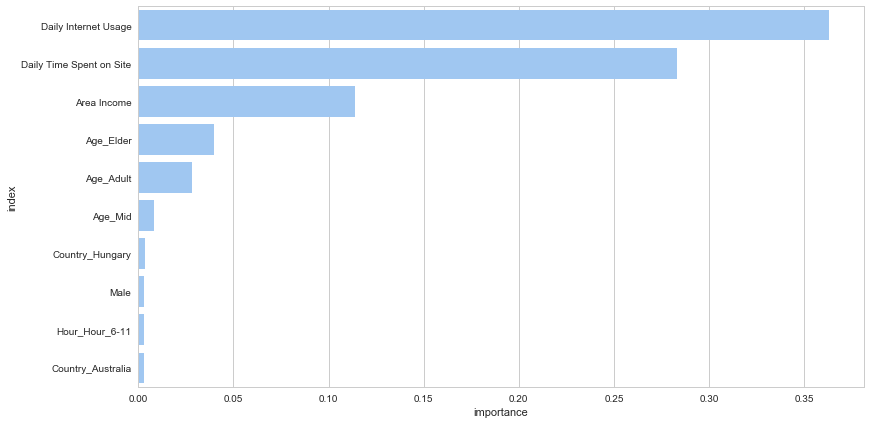

In [38]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances[0:10],
            label="Total", color="b")

# Recommendations

Above are the dominant features our model is predicting so our target population are the people:

- Who Spends less time on the internet
- Who spends less time on the website
- Who has lower income
- Who are older than our average sample (mean around 40 years old)